In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display settings
pd.set_option('display.max_columns', 125)
pd.set_option('display.max_rows', 125)


In [3]:
app_df = pd.read_csv('application_data.csv')
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
app_df.shape

(307511, 122)

In [5]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [6]:
app_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [7]:
prev_app_df = pd.read_csv("previous_application.csv")
prev_app_df.head()


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [8]:
prev_app_df.shape

(1670214, 37)

In [9]:
prev_app_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [10]:
prev_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [11]:
app_df_nullvalue_percent = round(app_df.isnull().sum()/app_df.shape[0] * 100 , 2).sort_values(ascending=False)
print(app_df_nullvalue_percent)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [12]:
prev_app_df_nullvalue_percent = round(prev_app_df.isnull().sum()/prev_app_df.shape[0] * 100 , 2).sort_values(ascending=False)
print(prev_app_df_nullvalue_percent)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
DAYS_TERMINATION               40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
NAME_YIELD_GROUP                0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
SK_ID_PREV                      0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
DAYS_DECISION                   0.00
N

In [13]:
mean_null = app_df.isnull().mean()

In [14]:
app_df = app_df.loc[:,mean_null<=0.45]

In [15]:
app_df.shape

(307511, 73)

In [16]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [17]:
new_app_df_nullvalue_percent = round(app_df.isnull().sum()/app_df.shape[0] * 100 , 2).sort_values(ascending=False)
print(new_app_df_nullvalue_percent)

OCCUPATION_TYPE                31.35
EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
FLAG_DOCUMENT_7                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_11                0.00
FLAG_DOCUMENT_8                 0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
LIVE_CITY_NOT_WORK_CITY         0.00
F

In [18]:
drop_col = ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
            'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
            'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
            'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
            'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
            'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK',
            'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR']

In [19]:
app_df.drop(labels=drop_col,axis=1 , inplace=True)

In [20]:
app_df.shape

(307511, 43)

In [21]:
app_df['OCCUPATION_TYPE'].value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [22]:
app_df['OCCUPATION_TYPE'].isnull().sum()

96391

In [23]:
app_df['OCCUPATION_TYPE'].replace(np.NaN , 'Unknown', inplace=True)

In [24]:
app_df['OCCUPATION_TYPE'].isnull().sum()

0

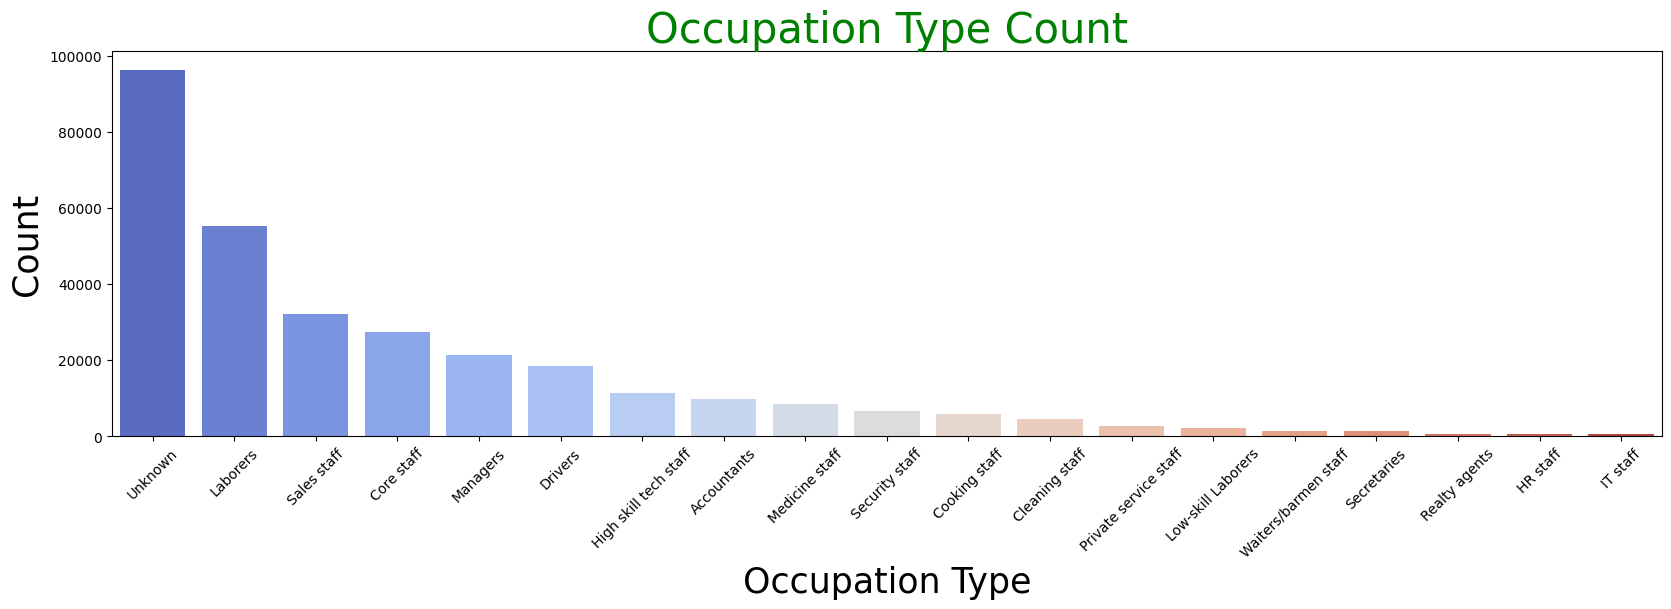

In [25]:
plt.figure(figsize=[20,5])
sns.barplot(x = app_df['OCCUPATION_TYPE'].value_counts().index, 
            y = app_df['OCCUPATION_TYPE'].value_counts().values,palette="coolwarm")

plt.title('Occupation Type Count', color='Green',fontsize = 30)  
plt.xlabel('Occupation Type',fontsize = 25)
plt.ylabel('Count',fontsize = 25)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [26]:
new_app_df_nullvalue_percent = round(app_df.isnull().sum()/app_df.shape[0] * 100 , 2).sort_values(ascending=False)
print(new_app_df_nullvalue_percent)

EXT_SOURCE_3                   19.83
NAME_TYPE_SUITE                 0.42
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
HOUR_APPR_PROCESS_START         0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
OCCUPATION_TYPE                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
SK_ID_CURR                      0.00
REG_REGION_NOT_LIVE_REGION      0.00
FLAG_WORK_PHONE                 0.00
REG_REGION_NOT_WORK_REGION      0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_CITY_NOT_LIVE_CITY          0.00
REG_CITY_NOT_WORK_CITY          0.00
LIVE_CITY_NOT_WORK_CITY         0.00
ORGANIZATION_TYPE               0.00
FLAG_CONT_MOBILE                0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
F

In [27]:
app_df['EXT_SOURCE_3'].isnull().sum()

60965

In [28]:
app_df['EXT_SOURCE_2'].isnull().sum()

660

<Axes: xlabel='EXT_SOURCE_2', ylabel='Density'>

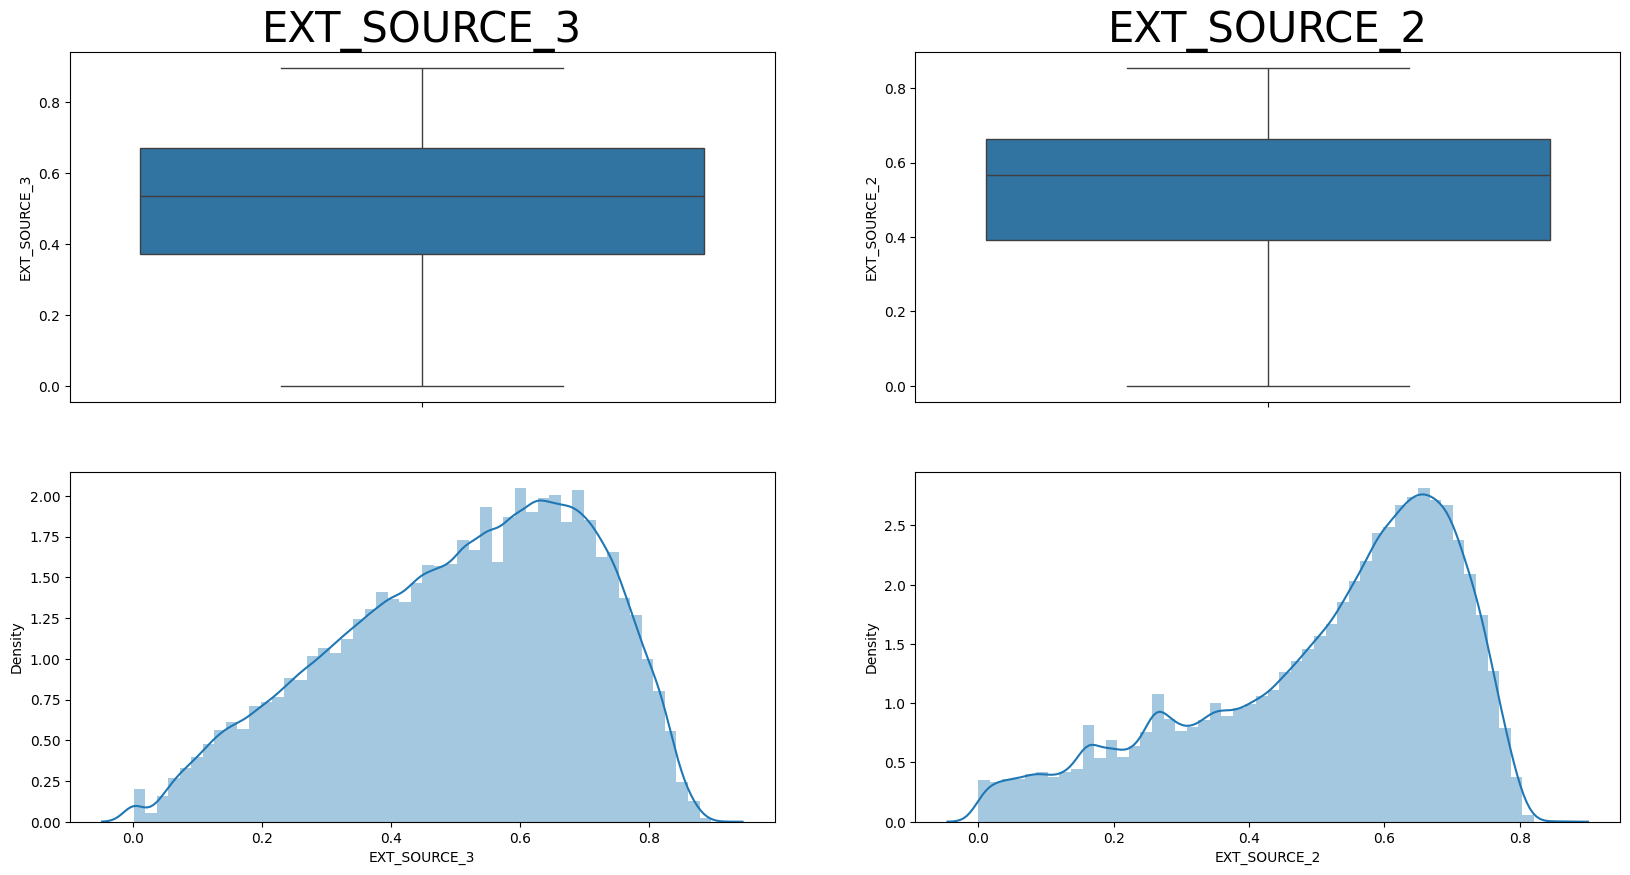

In [29]:
plt.figure(figsize = [20,10])

plt.subplot(2,2,1)
sns.boxplot(app_df['EXT_SOURCE_3']).set_title('EXT_SOURCE_3', fontsize = 30)

plt.subplot(2,2,2)
sns.boxplot(app_df['EXT_SOURCE_2']).set_title('EXT_SOURCE_2', fontsize = 30)

plt.subplot(2,2,3)
sns.distplot(app_df['EXT_SOURCE_3'])

plt.subplot(2,2,4)
sns.distplot(app_df['EXT_SOURCE_2'])

From this above graphs we can see that there is no outlier and there is small amount of skewness

In [30]:
for col in ['EXT_SOURCE_2','EXT_SOURCE_3']:
    app_df[col].fillna(app_df[col].median(),inplace=True)

In [31]:
new_app_df_nullvalue_percent = round(app_df.isnull().sum()/app_df.shape[0] * 100 , 2).sort_values(ascending=False)
print(new_app_df_nullvalue_percent)

NAME_TYPE_SUITE                0.42
AMT_GOODS_PRICE                0.09
REG_REGION_NOT_LIVE_REGION     0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
OCCUPATION_TYPE                0.00
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
SK_ID_CURR                     0.00
FLAG_WORK_PHONE                0.00
REG_REGION_NOT_WORK_REGION     0.00
LIVE_REGION_NOT_WORK_REGION    0.00
REG_CITY_NOT_LIVE_CITY         0.00
REG_CITY_NOT_WORK_CITY         0.00
LIVE_CITY_NOT_WORK_CITY        0.00
ORGANIZATION_TYPE              0.00
EXT_SOURCE_2                   0.00
EXT_SOURCE_3                   0.00
FLAG_CONT_MOBILE               0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                

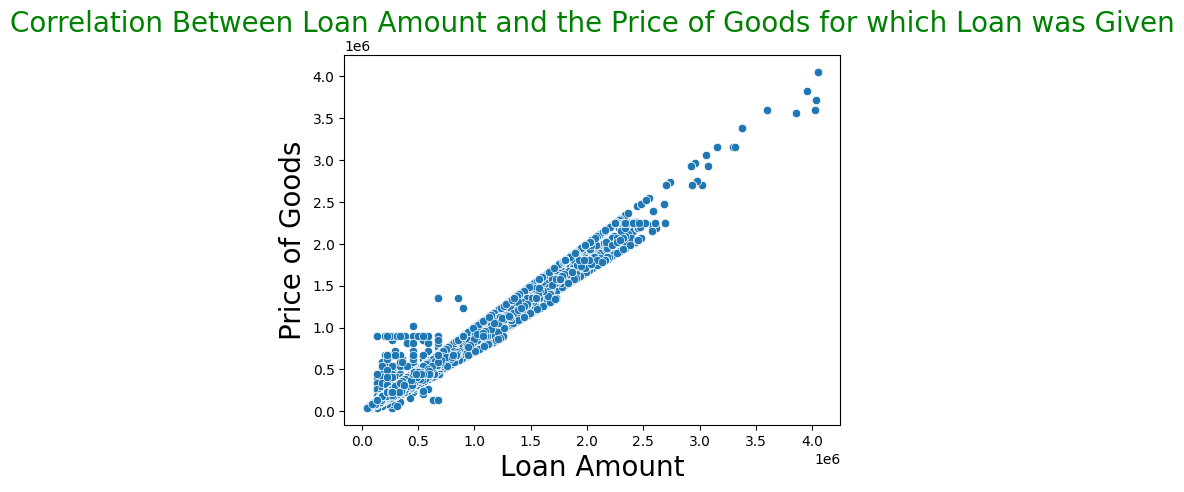

In [32]:
sns.scatterplot(x=app_df['AMT_CREDIT'] , y =app_df['AMT_GOODS_PRICE'] , data = app_df)
plt.title('Correlation Between Loan Amount and the Price of Goods for which Loan was Given',color='Green',fontsize=20,fontweight=5)
plt.xlabel('Loan Amount',fontsize=20)
plt.ylabel('Price of Goods',fontsize=20)
plt.show()

#### Observation

Since there is linear and positive correlation between loan amount and price of goods, we can assume that in most cases the loan amount demanded by the customer is slightly more than the price of goods he/she wanted to purchase. So for the AMT_GOODS_PRICE we can directly impute values of AMT_CREDIT as it seems like same in most cases for missing values.

In [33]:
app_df['AMT_GOODS_PRICE'] = np.where(app_df['AMT_GOODS_PRICE'].isnull() == True , app_df['AMT_CREDIT'],app_df['AMT_GOODS_PRICE'])

In [34]:
app_df['AMT_GOODS_PRICE'].isna().sum()

0

### Imputing data for NAME_TYPE_SUITE

In [35]:
app_df['NAME_TYPE_SUITE'].isna().sum()

1292

In [36]:
value_counts = app_df['NAME_TYPE_SUITE'].value_counts()

In [37]:
import plotly.graph_objs as go
import plotly.express as px

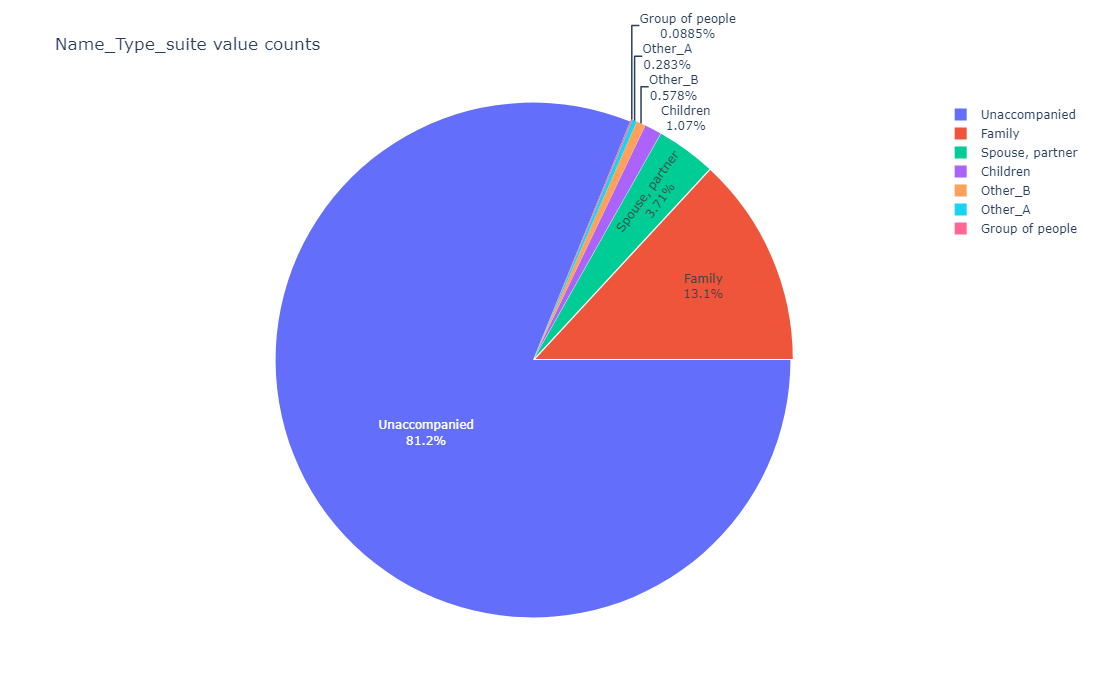

In [38]:
fig = go.Figure(data=[go.Pie(labels=value_counts.index, 
                             values=value_counts.values,
                             textinfo='percent+label', 
                             pull=[0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01], 
                             rotation=90)]) 
fig.update_layout(
    title_text='Name_Type_suite value counts',
    width=1000,  
    height=700,  
)

fig.show()

In [39]:
import math

In [40]:
app_df['NAME_TYPE_SUITE'].fillna(app_df['NAME_TYPE_SUITE'].mode()[0],inplace=True)

In [41]:
new_app_df_nullvalue_percent = round(app_df.isnull().sum()/app_df.shape[0] * 100 , 2).sort_values(ascending=False)
print(new_app_df_nullvalue_percent)

SK_ID_CURR                     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
WEEKDAY_APPR_PROCESS_START     0.0
REG_REGION_NOT_LIVE_REGION     0.0
FLAG_EMP_PHONE                 0.0
REG_REGION_NOT_WORK_REGION     0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
LIVE_CITY_NOT_WORK_CITY        0.0
ORGANIZATION_TYPE              0.0
EXT_SOURCE_2                   0.0
EXT_SOURCE_3                   0.0
FLAG_WORK_PHONE                0.0
FLAG_MOBIL                     0.0
TARGET                         0.0
AMT_GOODS_PRICE                0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN        

In [42]:
app_df.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    12
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 2
REGION_RATING_

In [43]:
# Dropping rows where the specified columns have missing values
app_df.dropna(subset=['AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS'], inplace=True)

In [44]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307496 entries, 0 to 307510
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307496 non-null  int64  
 1   TARGET                       307496 non-null  int64  
 2   NAME_CONTRACT_TYPE           307496 non-null  object 
 3   CODE_GENDER                  307496 non-null  object 
 4   FLAG_OWN_CAR                 307496 non-null  object 
 5   FLAG_OWN_REALTY              307496 non-null  object 
 6   CNT_CHILDREN                 307496 non-null  int64  
 7   AMT_INCOME_TOTAL             307496 non-null  float64
 8   AMT_CREDIT                   307496 non-null  float64
 9   AMT_ANNUITY                  307496 non-null  float64
 10  AMT_GOODS_PRICE              307496 non-null  float64
 11  NAME_TYPE_SUITE              307496 non-null  object 
 12  NAME_INCOME_TYPE             307496 non-null  object 
 13  NAME

Text(0.5, 1.0, 'GENDER VS TARGET')

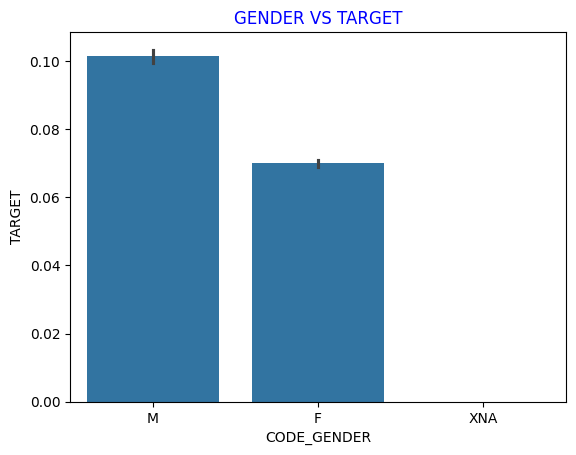

In [45]:
sns.barplot(x = app_df['CODE_GENDER'],y=app_df['TARGET'])
plt.title('GENDER VS TARGET',color='Blue')

In [46]:
print(len(app_df['ORGANIZATION_TYPE'].unique()))
print(round(app_df['ORGANIZATION_TYPE'].value_counts()/app_df['ORGANIZATION_TYPE'].shape[0] * 100 , 4))

58
ORGANIZATION_TYPE
Business Entity Type 3    22.1105
XNA                       18.0080
Self-employed             12.4909
Other                      5.4248
Medicine                   3.6397
Business Entity Type 2     3.4316
Government                 3.3831
School                     2.8921
Trade: type 7              2.5467
Kindergarten               2.2374
Construction               2.1857
Business Entity Type 1     1.9457
Transport: type 4          1.7555
Trade: type 3              1.1353
Industry: type 9           1.0953
Industry: type 3           1.0660
Security                   1.0556
Housing                    0.9620
Industry: type 11          0.8794
Military                   0.8566
Bank                       0.8153
Agriculture                0.7981
Police                     0.7613
Transport: type 2          0.7168
Postal                     0.7015
Security Ministries        0.6420
Trade: type 2              0.6179
Restaurant                 0.5890
Services                   

we noticed that there are many many sub categories in Business , Industry , Transport and Trade. So i am going to merge it and make it as single category

In [47]:
app_df['ORGANIZATION_TYPE'] = app_df['ORGANIZATION_TYPE'].apply(lambda x: 'Industry' if 'Industry' in x else x)
app_df['ORGANIZATION_TYPE'] = app_df['ORGANIZATION_TYPE'].apply(lambda x: 'Business' if 'Business' in x else x)
app_df['ORGANIZATION_TYPE'] = app_df['ORGANIZATION_TYPE'].apply(lambda x: 'Transport' if 'Transport' in x else x)
app_df['ORGANIZATION_TYPE'] = app_df['ORGANIZATION_TYPE'].apply(lambda x: 'Trade' if 'Trade' in x else x)

In [48]:
print(len(app_df['ORGANIZATION_TYPE'].unique()))
print(round(app_df['ORGANIZATION_TYPE'].value_counts()/app_df['ORGANIZATION_TYPE'].shape[0] * 100 , 4))

35
ORGANIZATION_TYPE
Business               27.4878
XNA                    18.0080
Self-employed          12.4909
Other                   5.4248
Trade                   4.6550
Industry                4.6540
Medicine                3.6397
Government              3.3831
Transport               2.9236
School                  2.8921
Kindergarten            2.2374
Construction            2.1857
Security                1.0556
Housing                 0.9620
Military                0.8566
Bank                    0.8153
Agriculture             0.7981
Police                  0.7613
Postal                  0.7015
Security Ministries     0.6420
Restaurant              0.5890
Services                0.5122
University              0.4316
Hotel                   0.3142
Electricity             0.3089
Insurance               0.1938
Telecom                 0.1876
Emergency               0.1821
Advertising             0.1395
Realtor                 0.1288
Culture                 0.1233
Mobile            

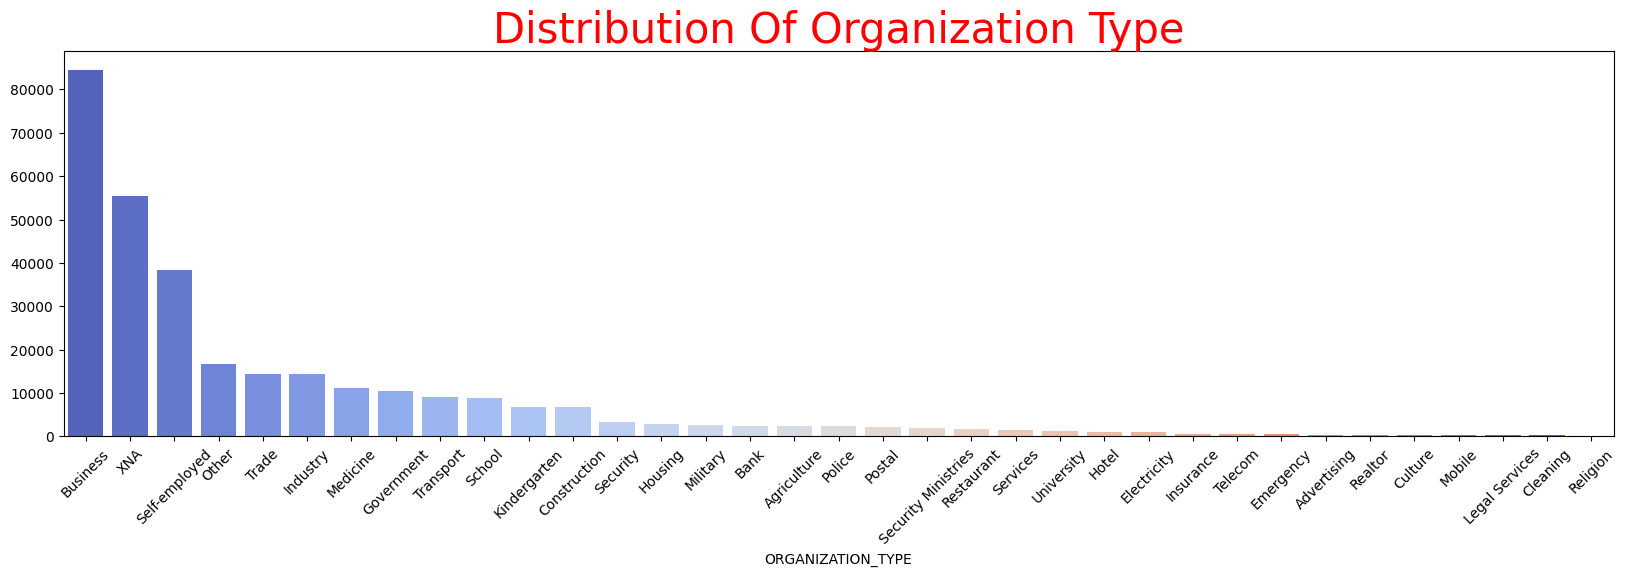

In [49]:
plt.figure(figsize = [20,5])
sns.barplot(x = app_df['ORGANIZATION_TYPE'].value_counts().index,y = app_df['ORGANIZATION_TYPE'].value_counts().values,palette = 'coolwarm')
plt.title('Distribution Of Organization Type',fontsize=30 , color='Red')
plt.xticks(rotation=45)
plt.show()

#### Observation
People In Business Field apply more for loan as compared to others

In [50]:
app_df['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278219
Revolving loans     29277
Name: count, dtype: int64

In [51]:
app_df['FLAG_OWN_CAR'].value_counts()

FLAG_OWN_CAR
N    202913
Y    104583
Name: count, dtype: int64

In [52]:
app_df['FLAG_OWN_REALTY'].value_counts()

FLAG_OWN_REALTY
Y    213306
N     94190
Name: count, dtype: int64

In [53]:
app_df['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      249804
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [54]:
app_df['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Working                 158767
Commercial associate     71612
Pensioner                55362
State servant            21700
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64

In [55]:
app_df['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218386
Higher education                  74857
Incomplete higher                 10275
Lower secondary                    3814
Academic degree                     164
Name: count, dtype: int64

In [56]:
app_df['WEEKDAY_APPR_PROCESS_START'].value_counts()

WEEKDAY_APPR_PROCESS_START
TUESDAY      53901
WEDNESDAY    51928
MONDAY       50713
THURSDAY     50590
FRIDAY       50333
SATURDAY     33850
SUNDAY       16181
Name: count, dtype: int64

In [57]:
num_days = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
for i in num_days:
    app_df[i] = abs(app_df[i])  # i am changing the values to positive as this contains the negative values and it represents the diff between the current 
                                # day and the value given.

In [58]:
app_df['DAYS_BIRTH']

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307496, dtype: int64

In [59]:
app_df['INCOME_SLAB'] = pd.qcut(app_df['AMT_INCOME_TOTAL'], q=[0,0.2,0.5,0.75,0.95,1], labels = ['very low','low','medium','high','very high'])

In [60]:
app_df['INCOME_SLAB'].value_counts()

INCOME_SLAB
low          90079
medium       82213
very low     63669
high         57501
very high    14034
Name: count, dtype: int64

In [61]:
app_df['AMT_CREDIT_SLAB'] = pd.qcut(app_df['AMT_CREDIT'], q=[0,0.2,0.5,0.75,0.95,1], labels = ['very low','low','medium','high','very high'])

In [62]:
app_df['AMT_CREDIT_SLAB'].value_counts()

AMT_CREDIT_SLAB
low          88918
medium       77781
very low     64923
high         61841
very high    14033
Name: count, dtype: int64

In [64]:
app_df['AGE'] = (app_df['DAYS_BIRTH']//365).astype('int64',errors = 'ignore')

In [66]:
app_df['AGE'].max()

69

In [67]:
app_df['AGE'].min()

20

In [68]:
app_df['AGE_BINS'] = pd.cut(app_df['AGE'] , bins=np.arange(20,71,5))

In [70]:
app_df['AGE_BINS'].value_counts()

AGE_BINS
(35, 40]    43679
(40, 45]    39995
(30, 35]    39433
(25, 30]    36486
(50, 55]    35096
(45, 50]    34402
(55, 60]    32721
(60, 65]    24359
(20, 25]    16315
(65, 70]     5009
Name: count, dtype: int64

In [75]:
# Calculating the percentage of TARGET == 0
target_0 = round((app_df['TARGET'] == 0).sum() / len(app_df), 4) * 100
print("Target_0_percentage:", target_0, "%")


Target_0_percentage: 91.93 %


In [77]:
target_1 = round((app_df['TARGET'] == 1).sum() / len(app_df), 4) * 100
print("Target_1_percentage:", target_1, "%")


Target_1_percentage: 8.07 %


In [80]:
target1 = app_df[app_df['TARGET'] == 1]
target0 = app_df[app_df['TARGET'] == 0]

In [81]:
print(target1.shape , target0.shape , app_df.shape)

(24825, 47) (282671, 47) (307496, 47)


### Performing some Univariate Analysis on categorical columns that is GENDER and comparing the characteristics with defaulters and Non-defaulters

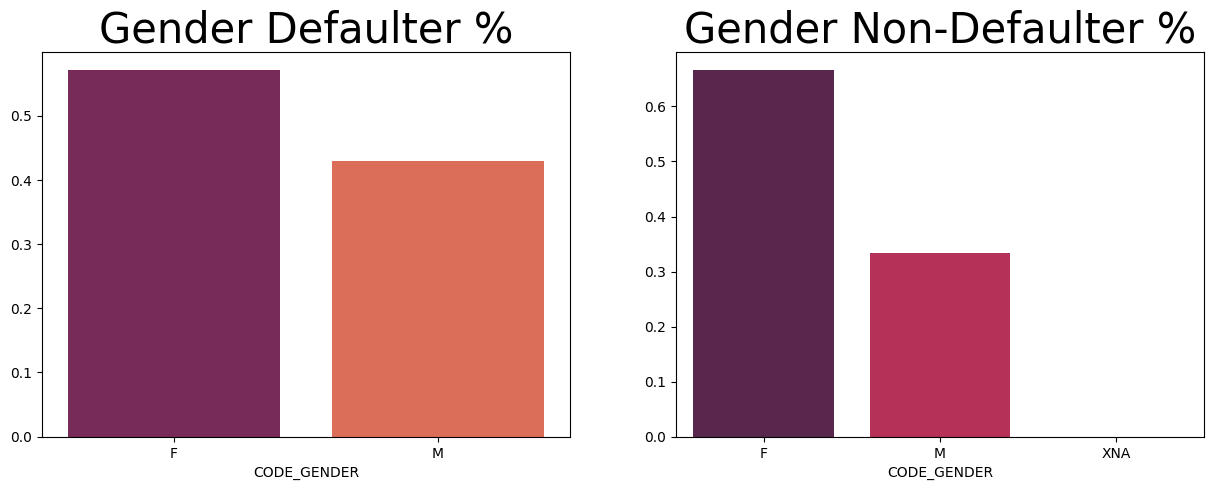

In [83]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.barplot(x = target1['CODE_GENDER'].value_counts(normalize=True).index,
            y = target1['CODE_GENDER'].value_counts(normalize=True).values, palette = 'rocket').set_title('Gender Defaulter %',fontsize = 30)

plt.subplot(1,2,2)
sns.barplot(x = target0['CODE_GENDER'].value_counts(normalize=True).index,
            y = target0['CODE_GENDER'].value_counts(normalize=True).values, palette = 'rocket').set_title('Gender Non-Defaulter %',fontsize = 30)

plt.show()

#### Observation
we can say that men are more default as compare to women


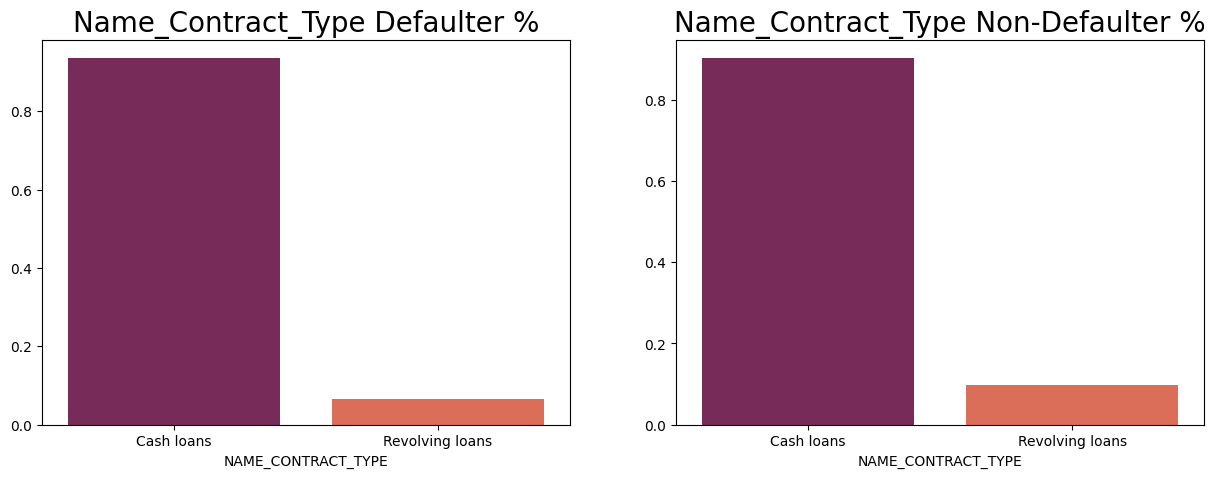

In [86]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.barplot(x = target1['NAME_CONTRACT_TYPE'].value_counts(normalize=True).index,
            y = target1['NAME_CONTRACT_TYPE'].value_counts(normalize=True).values, palette = 'rocket').set_title('Name_Contract_Type Defaulter %',fontsize = 20)

plt.subplot(1,2,2)
sns.barplot(x = target0['NAME_CONTRACT_TYPE'].value_counts(normalize=True).index,
            y = target0['NAME_CONTRACT_TYPE'].value_counts(normalize=True).values, palette = 'rocket').set_title('Name_Contract_Type Non-Defaulter %',fontsize = 20)

plt.show()

From this we cant say more about defaulters as both of the graphs are seems to be same

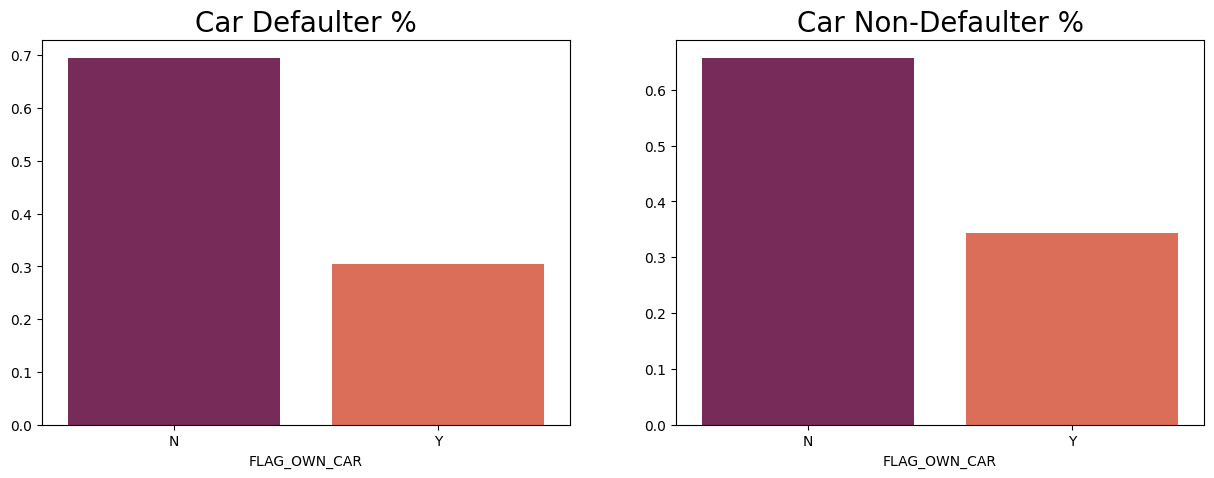

In [87]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.barplot(x = target1['FLAG_OWN_CAR'].value_counts(normalize=True).index,
            y = target1['FLAG_OWN_CAR'].value_counts(normalize=True).values, palette = 'rocket').set_title('Car Defaulter %',fontsize = 20)

plt.subplot(1,2,2)
sns.barplot(x = target0['FLAG_OWN_CAR'].value_counts(normalize=True).index,
            y = target0['FLAG_OWN_CAR'].value_counts(normalize=True).values, palette = 'rocket').set_title('Car Non-Defaulter %',fontsize = 20)

plt.show()

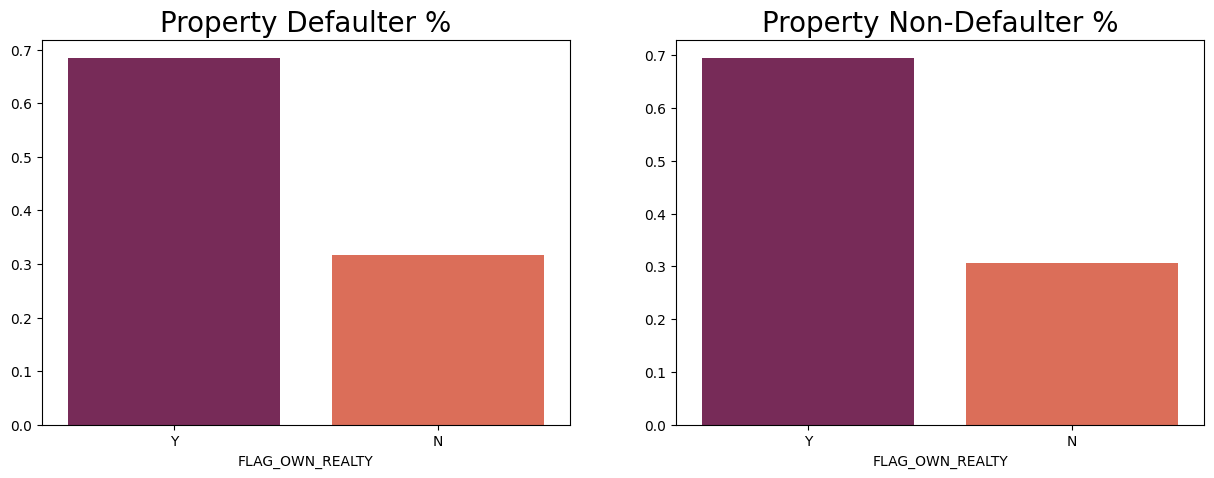

In [88]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.barplot(x = target1['FLAG_OWN_REALTY'].value_counts(normalize=True).index,
            y = target1['FLAG_OWN_REALTY'].value_counts(normalize=True).values, palette = 'rocket').set_title('Property Defaulter %',fontsize = 20)

plt.subplot(1,2,2)
sns.barplot(x = target0['FLAG_OWN_REALTY'].value_counts(normalize=True).index,
            y = target0['FLAG_OWN_REALTY'].value_counts(normalize=True).values, palette = 'rocket').set_title('Property Non-Defaulter %',fontsize = 20)

plt.show()

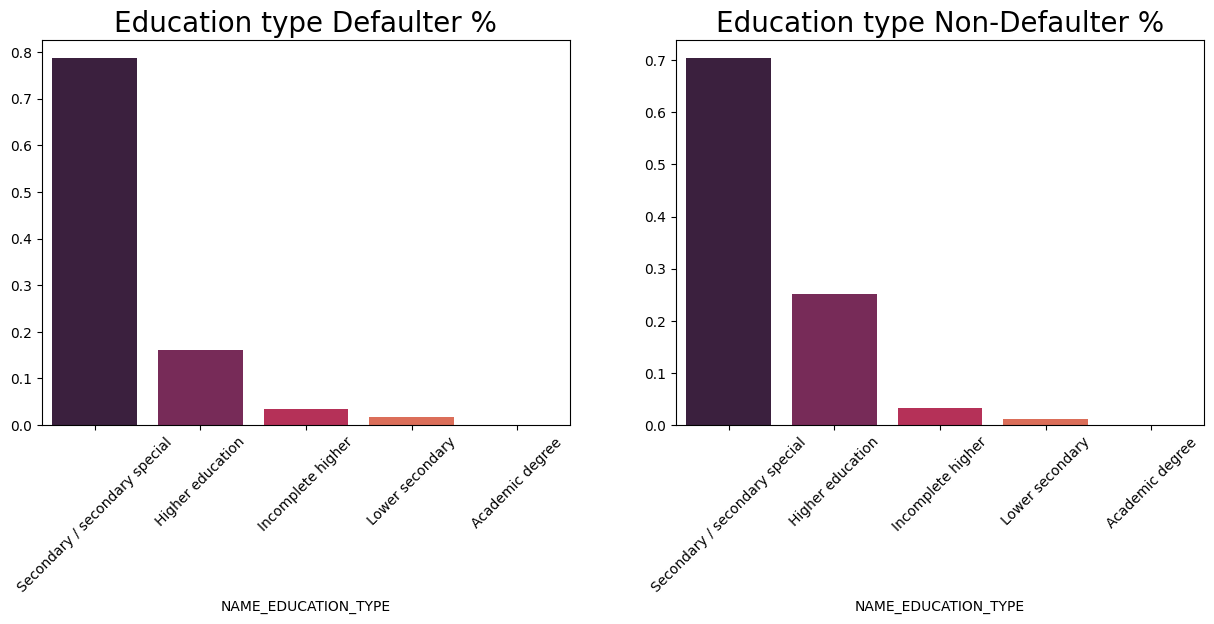

In [92]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.barplot(x = target1['NAME_EDUCATION_TYPE'].value_counts(normalize=True).index,
            y = target1['NAME_EDUCATION_TYPE'].value_counts(normalize=True).values, palette = 'rocket').set_title('Education type Defaulter %',fontsize = 20)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(x = target0['NAME_EDUCATION_TYPE'].value_counts(normalize=True).index,
            y = target0['NAME_EDUCATION_TYPE'].value_counts(normalize=True).values, palette = 'rocket').set_title('Education type Non-Defaulter %',fontsize = 20)
plt.xticks(rotation=45)
plt.show()

From this we can see that higher education is less defaulters as compare to student who studies in Secondary education

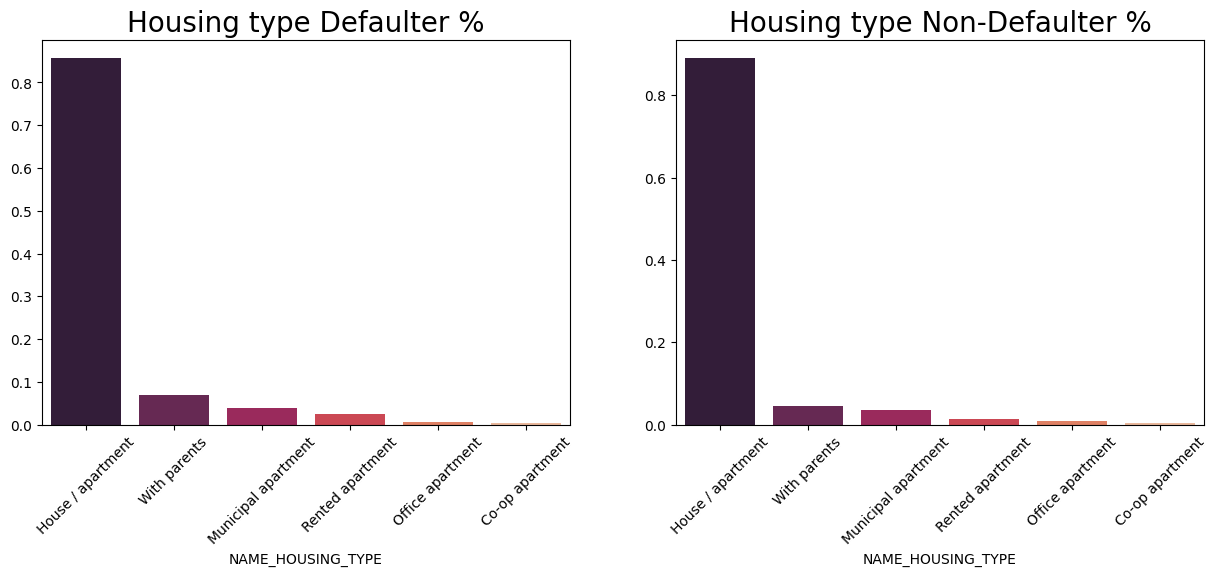

In [93]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
sns.barplot(x = target1['NAME_HOUSING_TYPE'].value_counts(normalize=True).index,
            y = target1['NAME_HOUSING_TYPE'].value_counts(normalize=True).values, palette = 'rocket').set_title('Housing type Defaulter %',fontsize = 20)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.barplot(x = target0['NAME_HOUSING_TYPE'].value_counts(normalize=True).index,
            y = target0['NAME_HOUSING_TYPE'].value_counts(normalize=True).values, palette = 'rocket').set_title('Housing type Non-Defaulter %',fontsize = 20)
plt.xticks(rotation=45)
plt.show()

From this we can see that peoples who lives in Houses and apartments are more like to pay the loan as compare to others

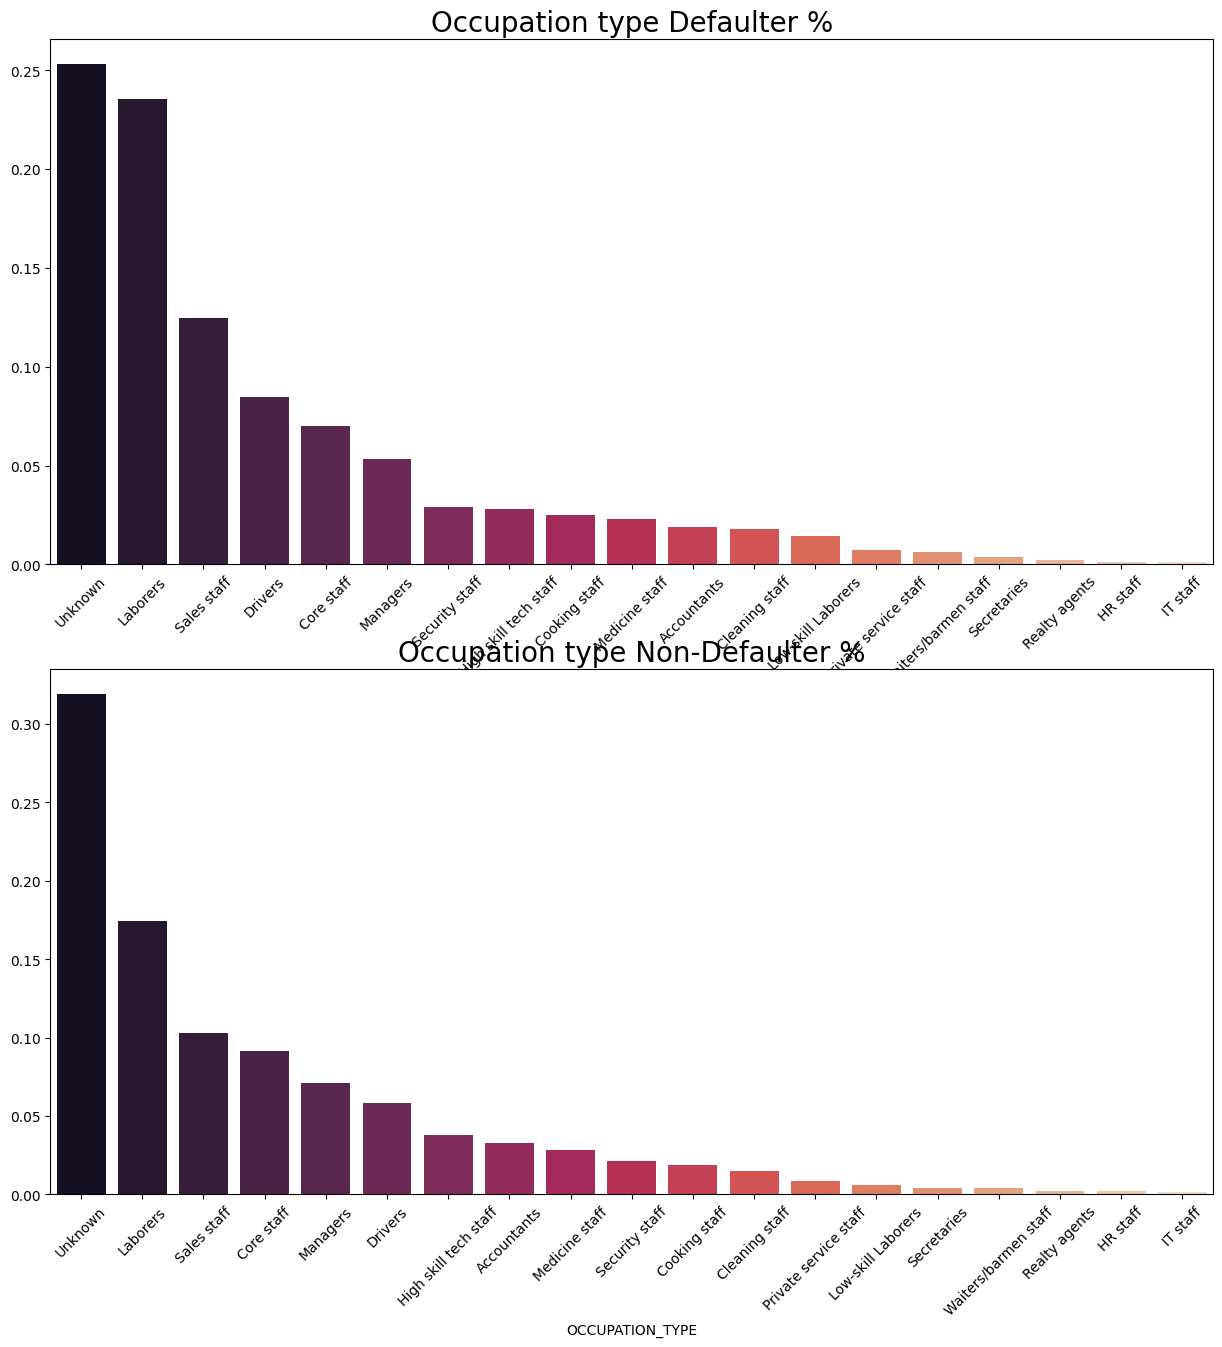

In [98]:
plt.figure(figsize = [15,15])
plt.subplot(2,1,1)
sns.barplot(x = target1['OCCUPATION_TYPE'].value_counts(normalize=True).index,
            y = target1['OCCUPATION_TYPE'].value_counts(normalize=True).values, palette = 'rocket').set_title('Occupation type Defaulter %',fontsize = 20)
plt.xticks(rotation=45)
plt.subplot(2,1,2)
sns.barplot(x = target0['OCCUPATION_TYPE'].value_counts(normalize=True).index,
            y = target0['OCCUPATION_TYPE'].value_counts(normalize=True).values, palette = 'rocket').set_title('Occupation type Non-Defaulter %',fontsize = 20)
plt.xticks(rotation=45)
plt.show()

From this graph we can see that Labourers , sales staff, drivers , cleaning staff and low skill labourers are more likely to default a payment of a loan.
The best clients to target are Core staff , Managers , High skill tech staff

In [100]:
prev_app_df.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [101]:
# required columns
cols = ['SK_ID_CURR','AMT_APPLICATION','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','DAYS_DECISION','NAME_PAYMENT_TYPE','CODE_REJECT_REASON',
        'NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_YIELD_GROUP']
prev_app_df = prev_app_df.loc[:,cols]

In [102]:
prev_app_df.shape

(1670214, 13)

In [103]:
prev_app_df.isna().sum()

SK_ID_CURR                0
AMT_APPLICATION           0
NAME_CASH_LOAN_PURPOSE    0
NAME_CONTRACT_STATUS      0
DAYS_DECISION             0
NAME_PAYMENT_TYPE         0
CODE_REJECT_REASON        0
NAME_CLIENT_TYPE          0
NAME_GOODS_CATEGORY       0
NAME_PORTFOLIO            0
NAME_PRODUCT_TYPE         0
CHANNEL_TYPE              0
NAME_YIELD_GROUP          0
dtype: int64

In [104]:
prev_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1670214 non-null  int64  
 1   AMT_APPLICATION         1670214 non-null  float64
 2   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 3   NAME_CONTRACT_STATUS    1670214 non-null  object 
 4   DAYS_DECISION           1670214 non-null  int64  
 5   NAME_PAYMENT_TYPE       1670214 non-null  object 
 6   CODE_REJECT_REASON      1670214 non-null  object 
 7   NAME_CLIENT_TYPE        1670214 non-null  object 
 8   NAME_GOODS_CATEGORY     1670214 non-null  object 
 9   NAME_PORTFOLIO          1670214 non-null  object 
 10  NAME_PRODUCT_TYPE       1670214 non-null  object 
 11  CHANNEL_TYPE            1670214 non-null  object 
 12  NAME_YIELD_GROUP        1670214 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 165.7+ 

In [105]:
prev_app_df['DAYS_DECISION'] = abs(prev_app_df['DAYS_DECISION'])

In [106]:
prev_app_df['NAME_PAYMENT_TYPE'].value_counts()

NAME_PAYMENT_TYPE
Cash through the bank                        1033552
XNA                                           627384
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: count, dtype: int64

In [107]:
prev_app_df['NAME_CLIENT_TYPE'].value_counts()

NAME_CLIENT_TYPE
Repeater     1231261
New           301363
Refreshed     135649
XNA             1941
Name: count, dtype: int64

In [108]:
prev_app_df['NAME_PORTFOLIO'].value_counts()

NAME_PORTFOLIO
POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: count, dtype: int64

### UNIVARIATE ANALYSIS

Text(0.5, 1.0, 'AMT_APPLICATION DISTRIBUTION')

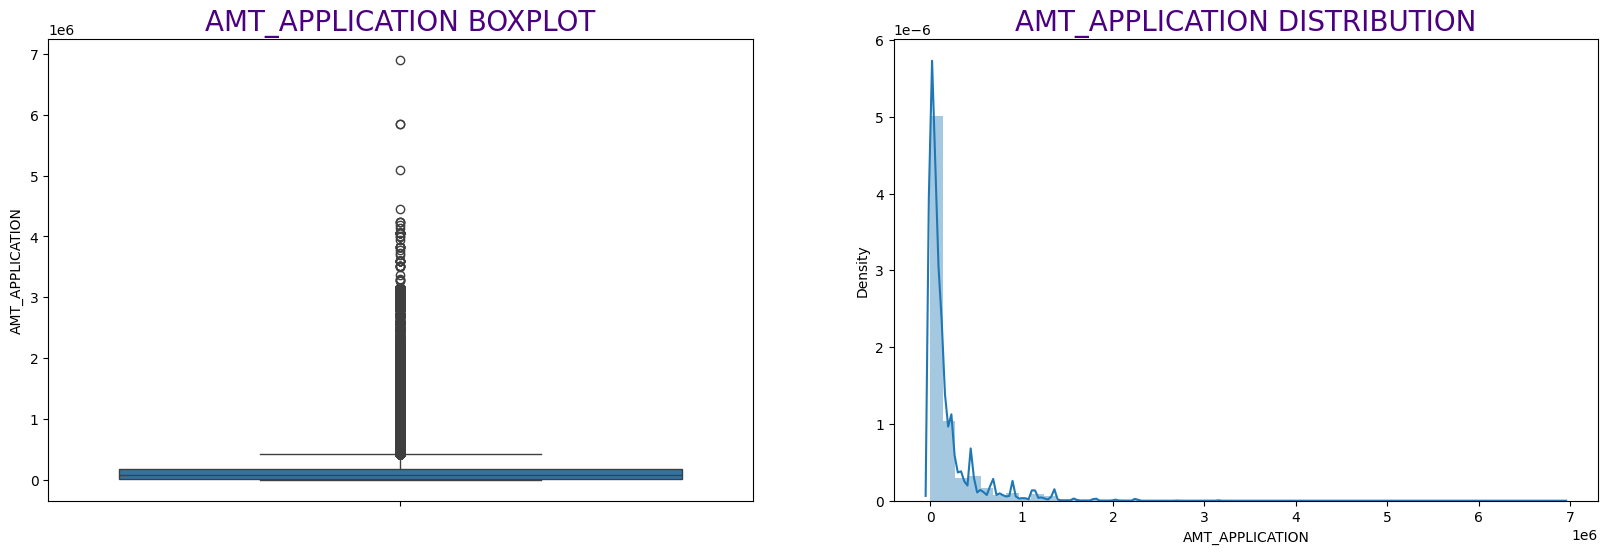

In [110]:
plt.figure(figsize=[20,6])
plt.subplot(121)
sns.boxplot(prev_app_df['AMT_APPLICATION']).set_title('AMT_APPLICATION BOXPLOT',color='Indigo',fontsize=20)

plt.subplot(122)
sns.distplot(prev_app_df['AMT_APPLICATION']).set_title('AMT_APPLICATION DISTRIBUTION',color='Indigo',fontsize=20)


from the plots we can see that most of the clients are required an amount of less than or equal to 10 lakhs. Most of the credit near about 1-3 lakh marker

Text(0.5, 1.0, 'DAYS_DECISION DISTRIBUTION')

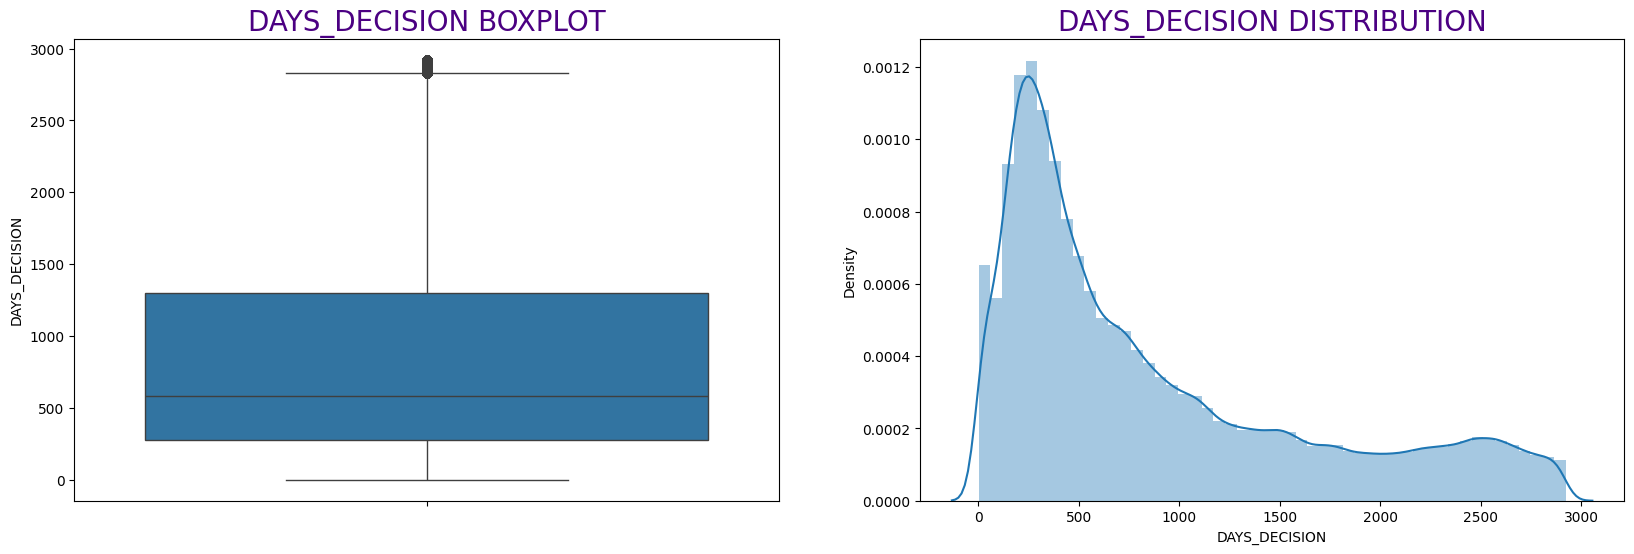

In [111]:
plt.figure(figsize=[20,6])
plt.subplot(121)
sns.boxplot(prev_app_df['DAYS_DECISION']).set_title('DAYS_DECISION BOXPLOT',color='Indigo',fontsize=20)

plt.subplot(122)
sns.distplot(prev_app_df['DAYS_DECISION']).set_title('DAYS_DECISION DISTRIBUTION',color='Indigo',fontsize=20)


Here from the plot we can see that the client who tooks loan will came again in time period of 2 years

### REASON FOR LOAN

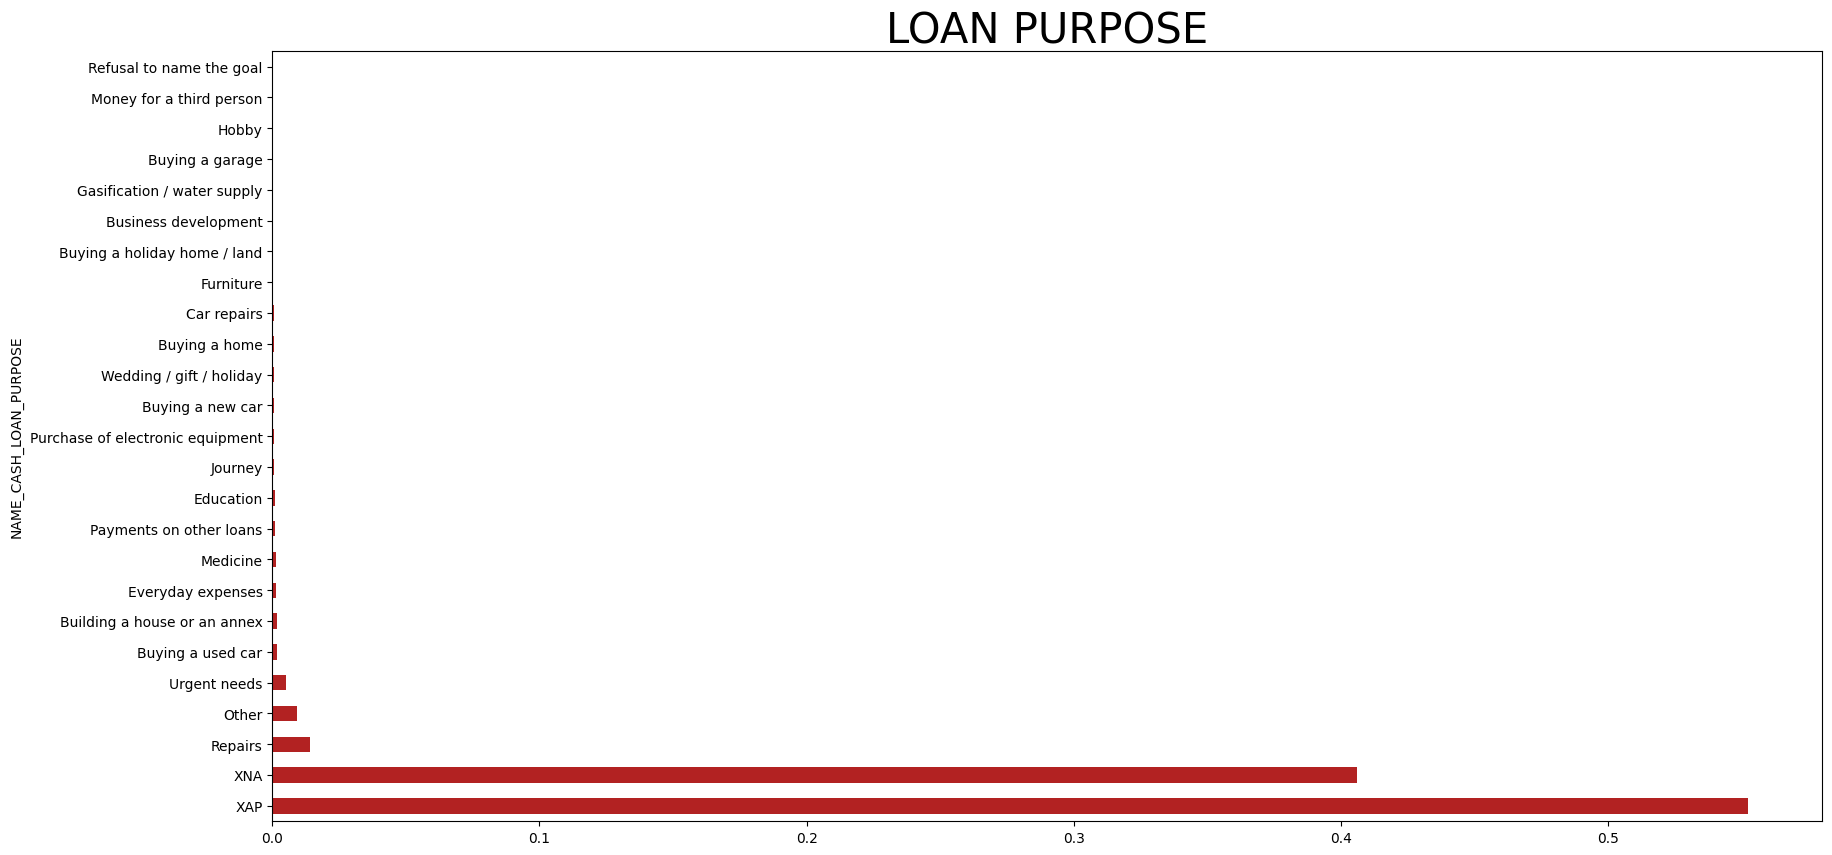

In [114]:
plt.figure(figsize=[20,10])
prev_app_df['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True).plot.barh(color='firebrick')
plt.title('LOAN PURPOSE',fontsize=30)
plt.show()

           

HERE most of the reasons are Unknown so this feature cant be more helpful is analysis

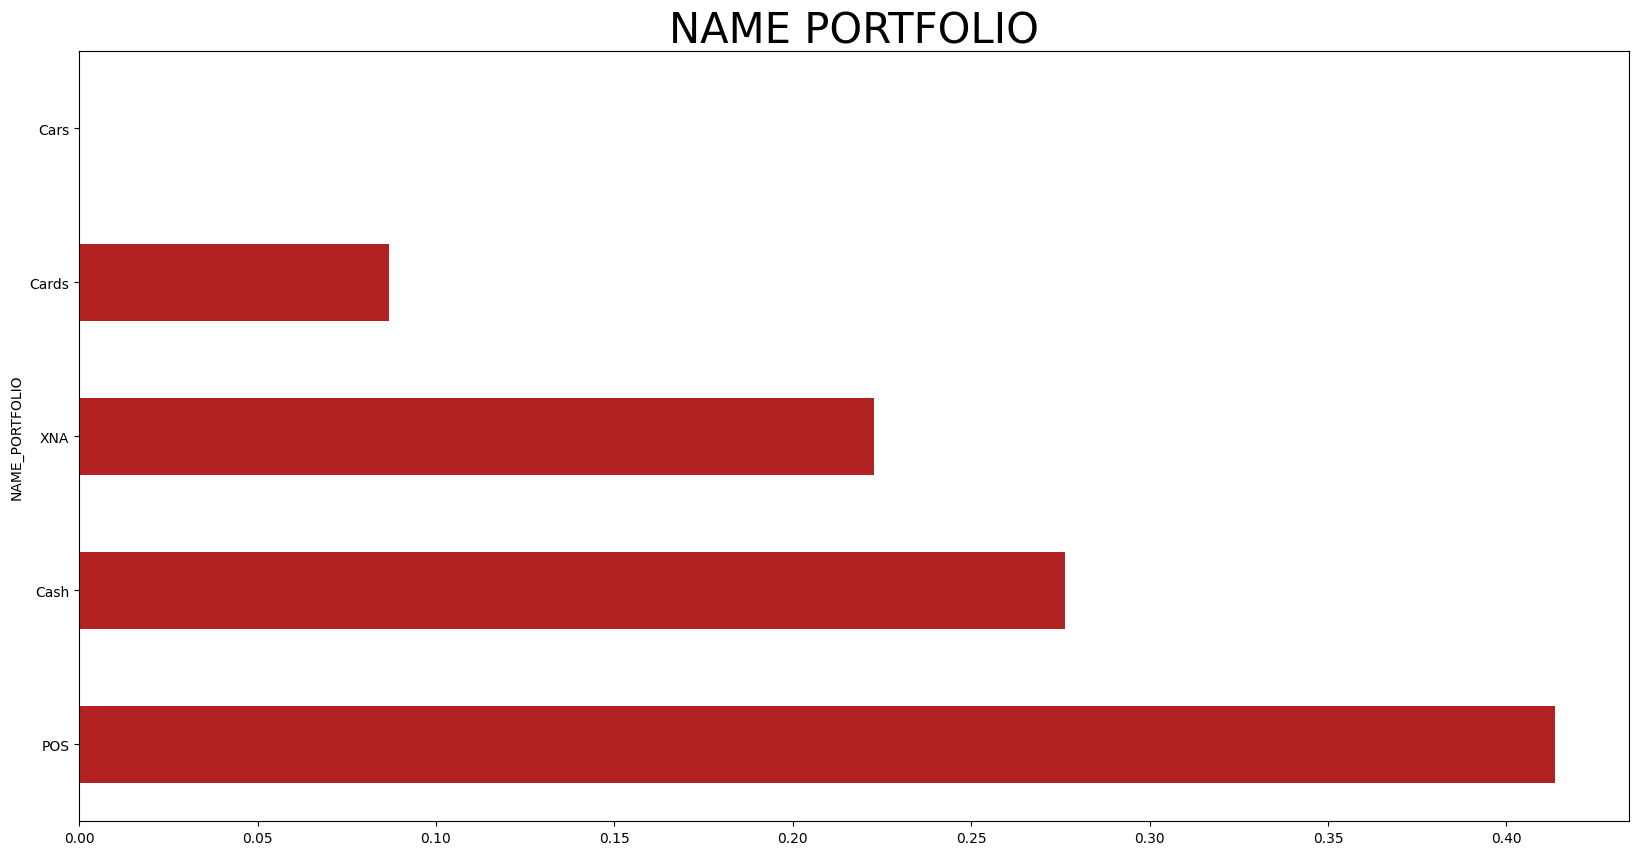

In [115]:
plt.figure(figsize=[20,10])
prev_app_df['NAME_PORTFOLIO'].value_counts(normalize=True).plot.barh(color='firebrick')
plt.title('NAME PORTFOLIO',fontsize=30)
plt.show()

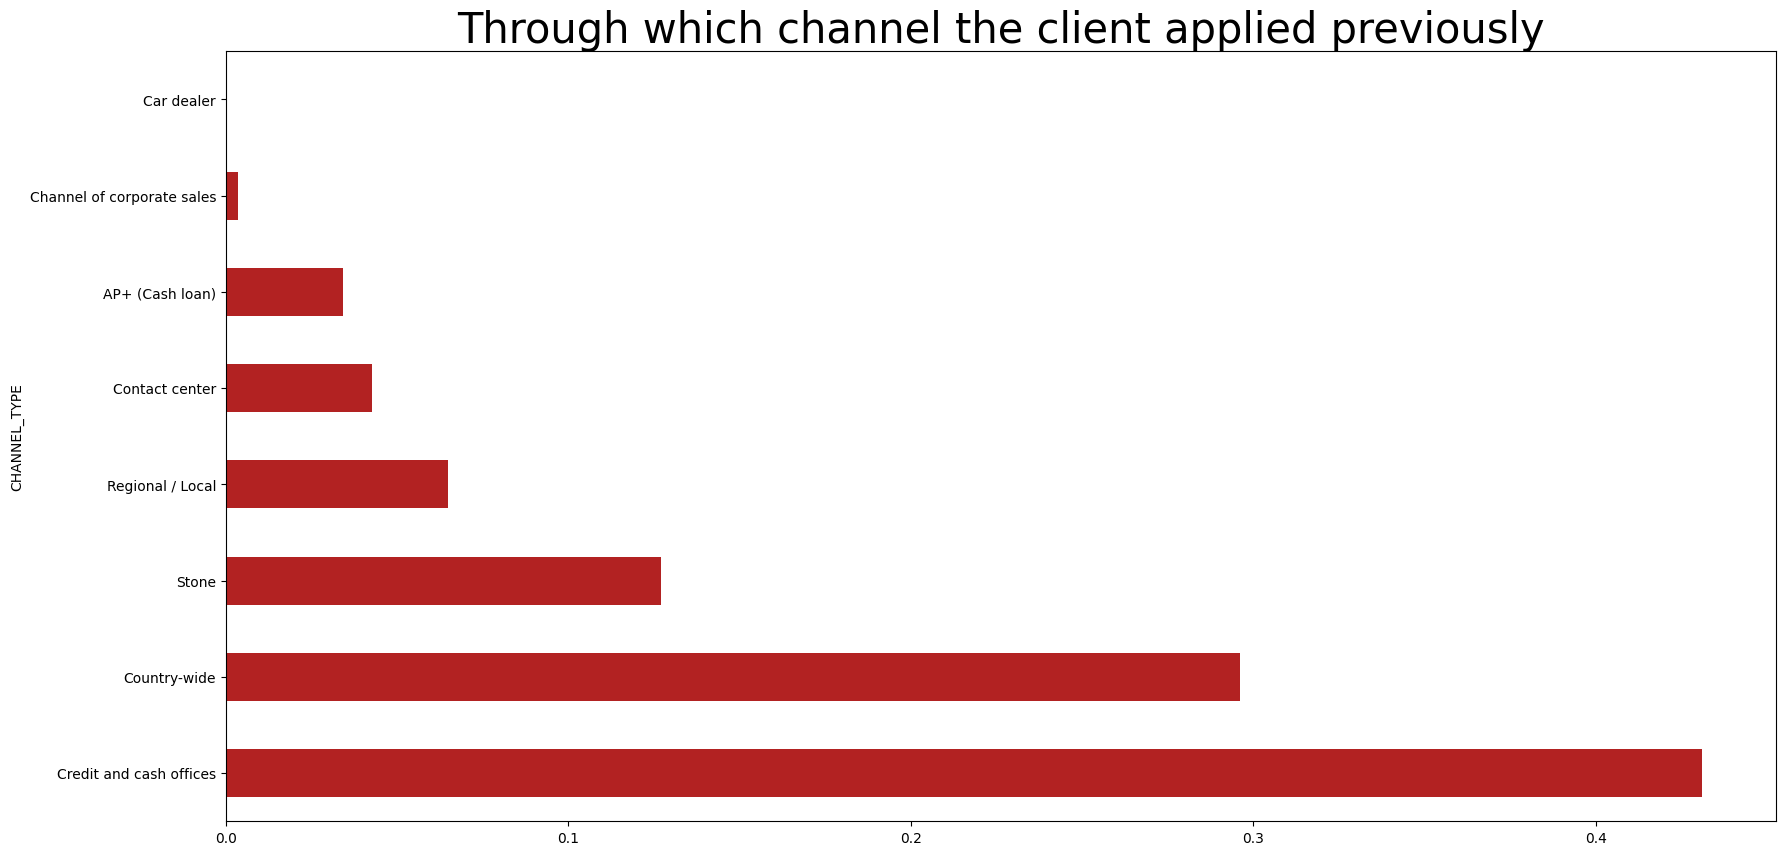

In [116]:
plt.figure(figsize=[20,10])
prev_app_df['CHANNEL_TYPE'].value_counts(normalize=True).plot.barh(color='firebrick')
plt.title('Through which channel the client applied previously',fontsize=30)
plt.show()

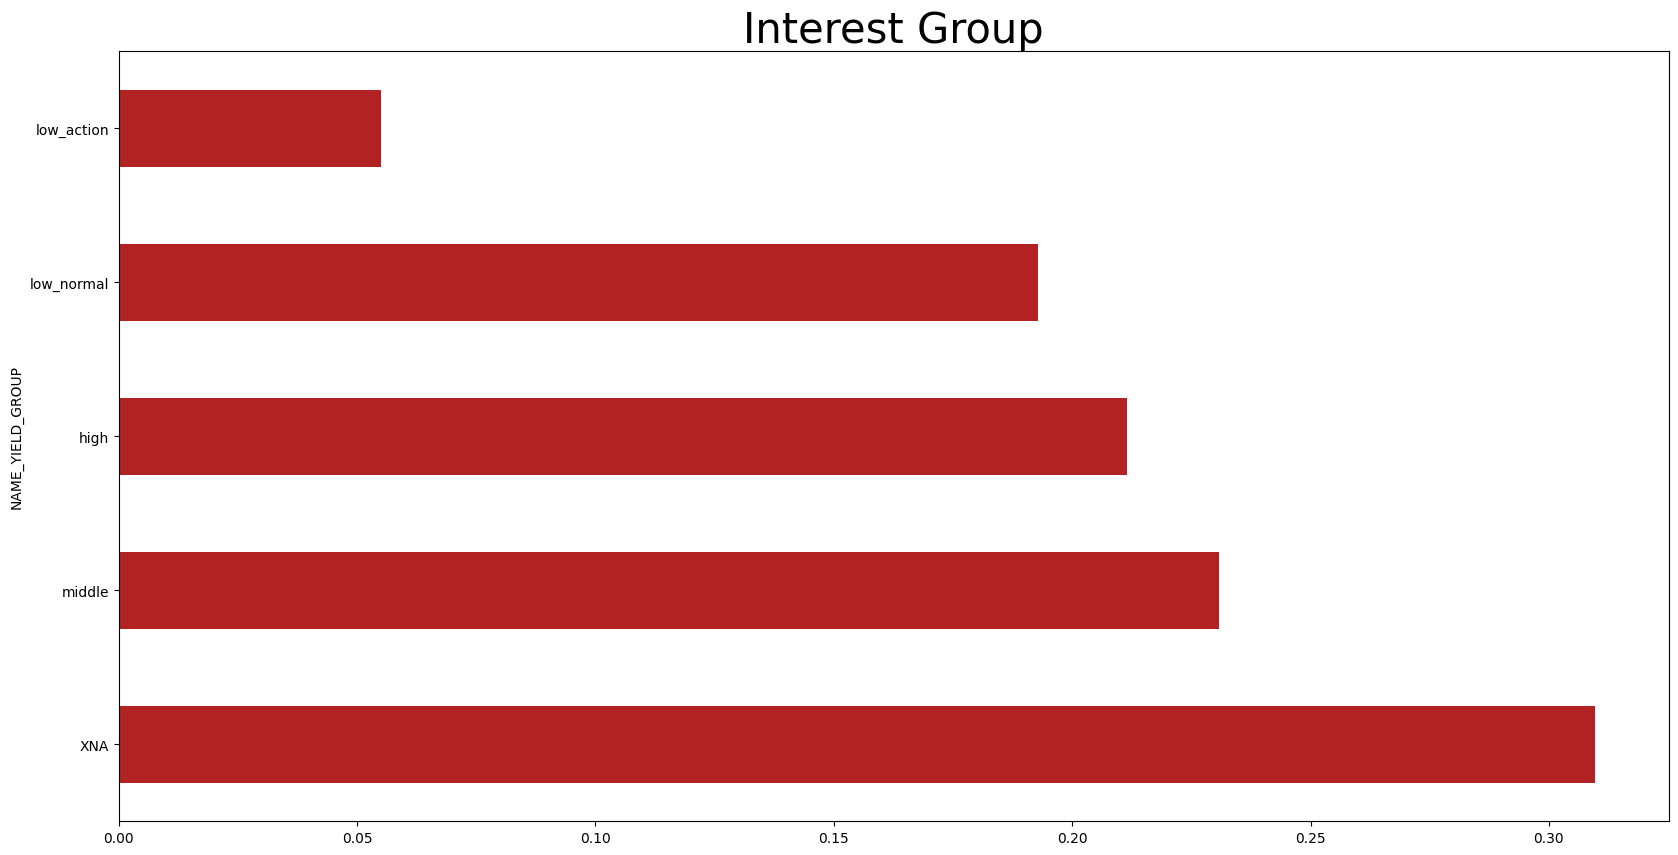

In [117]:
plt.figure(figsize=[20,10])
prev_app_df['NAME_YIELD_GROUP'].value_counts(normalize=True).plot.barh(color='firebrick')
plt.title('Interest Group',fontsize=30)
plt.show()